<h1>Project quarter car<span class="tocSkip"></span></h1>

Please fill in the names of the team mebers.

<div class="alert alert-block alert-danger">

<b>Team: 6</b>
- Moritz
- Emir
- Alessa
- Noah
    
<b>Result:</b>
    
| Task   |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |  Sum  |
|--------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|--------
| Points | ?/2 | ?/2 | ?/2 | ?/2 | ?/1 | ?/3 | ?/3 | ?/2 | ?/1 | ?/2 | ??/20 |  

    
</div>

## Packages

<div class="alert alert-block alert-danger">
    
<b>Important: Do not import other packages or libraries!</b>
    
</div>

### Python

In [1]:
from platform import python_version
print('python version = '+ python_version())

python version = 3.9.12


### Display images and videos

In [2]:
from IPython.display import HTML, Image, IFrame, YouTubeVideo

### NumPy

In [3]:
import numpy as np
print('numpy version = '+ np.__version__)

numpy version = 1.21.5


### SymPy

In [4]:
import sympy as sp
print('sympy version = '+ sp.__version__)
sp.init_printing()

sympy version = 1.10.1


### Matplotlib

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
print('matplotlib version = '+ matplotlib.__version__)

matplotlib version = 3.5.1


### Google Colab
If you are using Google Colab mount drive and change directory.

In [6]:
if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd '/content/gdrive/MyDrive/Colab Notebooks/Modelling and Simulation/quarter_car'
else:
    print('Not running on Google Colab')

Not running on Google Colab


## 1 Modelling
Vehicle dynamics describes the effect of forces on moving vehicles, such as cars.
In the simulation of vehicle dynamics, the behavior of a digital vehicle model is calculated by computer programs.
In this process, certain driving situations are performed virtually.
A realistic simulation requires a complex modelling of the parts installed in the vehicle.
Especially for tires, there are many different models for simulation.
Simulations are also used to optimize the design of the vehicle in terms of fuel consumption and environmental impact.

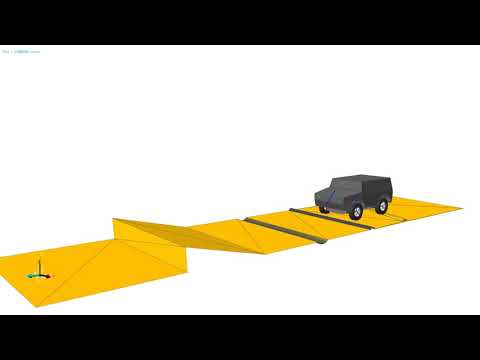

In [7]:
YouTubeVideo('656Unj19nww')

In this project a very simplified model is considered, where the vehicle consists of only one mass point, which is connected to a wheel via a spring-damper system.
In vehicle dynamics, this simplified model is called a quarter car suspension.
The aim is to simulate and visualize the vibration behavior of the spring-damper system.
Virtual test tracks with different road profiles are analysed.

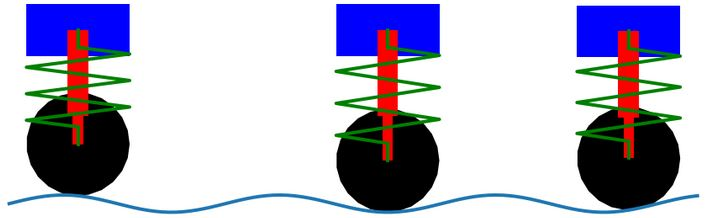

In [8]:
Image('quarter_car_coble_stones.jpg', width=353, height=109)

## 2 Numerical treatment
A mathematical description for both the test track and the spring-damper system is needed.

### 2.1 Coordinate system
The common coordinate system for the test track and the spring-damper system is defined in such a way that the rolling movement of the wheel is in the direction of the $x$-axis and the oscillation of the mass is perpendicular to this in the $y$-direction.
The position of the origin is at the point where the wheel touches the road surface at the beginning of the test track.
The vehicle drives in $x$-direction with constant speed $v$.

### 2.2 Test track
The vibration behaviour of the quarter vehicle is influenced by the mass $m$, which is ideally concentrated in one point.
The aim is to simulate the movement of this mass point.
Starting at time $t_0=0$ the time $t_{\mbox{max}}$ is required to run the test track.
At time $t$ the mass point is located at position

$$
\left(\, x(t) \mid y(t) \,\right), \quad t \in \left[t_0,t_1\right] \, .
$$

To describe the height of road profile at postion $x$ a function $f$ is used:

$$
f(x(t)), \quad t \in \left[t_0,t_1\right] \, .
$$

Since the movement starts at the origin, the function $f$ must fulfill the condition

$$
    f(0)=0.
$$

A simple approach is to simulate a rumble strip test track, represented by the function 

$$
    f(x) = A \, sin( \omega \, x) \, .
    \quad \quad (*)
$$

Here $\omega$ denotes the angular frequency and $A$ is used to specify the height of the rumble strips.   

### 2.3 Equation of motion
For a test track which, apart from a few bumps in the ground, runs horizontally, there is an approximate correlation at constant speed $v$:

$$
x(t) = v \, t, \quad \dot{x}(t) = v \, .
$$

The vertical deflection $y(t)$ of the idealized mass point as a function of time $t$ is not so easy to determine.
Depending on the profile of the test track, the mass oscillates around the equilibrium position, which is designated $y_0$.
The mass point is in the equilibrium position at the beginning of the test drive and the speed in $y$ direction is zero:

$$
y(0) = y_0, \quad \dot{y}(0) = 0.
$$

The aim is to determine a mathematical description of the movement of the mass point as a function of time.
This mathematical description results from the consideration of several physical laws.

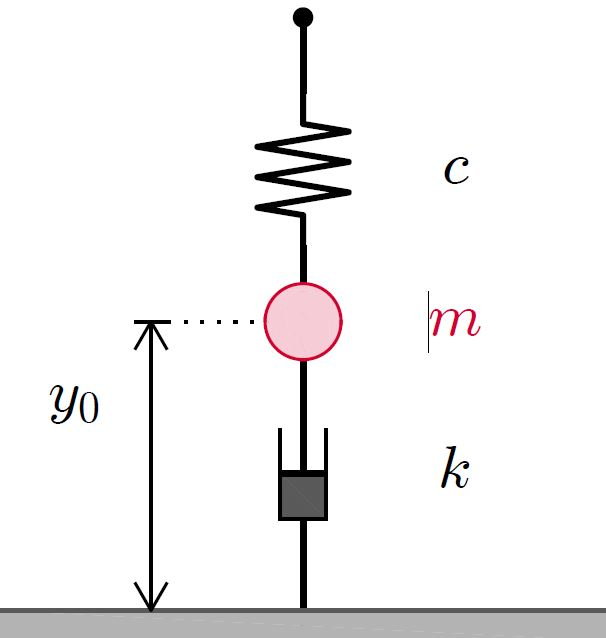

In [9]:
Image('quarter_car_mass_spring_damper.jpg', width=150, height=160)

<b>Spring</b>

According to Hooke's law, the distance of extension or compression of a spring is approximately proportional to the force acting on it.
The proportionality factor $c$ is called the characteristic of the spring.
For the spring force $F_{\mbox{spring}}$, which acts on the mass $m$ at time $t$, the following applies:

$$
F_{\mbox{spring}}(t) = - c \, \underbrace{ \left( y(t) - y_0 - f(x(t)) \right) }_{\mbox{vertical deflection}}.
$$

The vertical deflection at time $t$ depends on the vertical position $y$ of the mass $m$, the equilibrium position $y_0$ and the height of the road profile $f$.
The negative sign results from the fact that the spring force on the mass always acts against the direction of the deflection.

<b>Damper</b>

The damper creates a frictional force $F_{\mbox{damper}}$.
Because of the small speed of the movement in $y$ direction, we assume that the frictional force is proportional to the speed of the mass $m$ in vertical direction.
The proportionality factor $k$ is called damping coefficient.
The frictional force acts against the direction of movement, so the following applies:

$$
	F_{\mbox{damper}}(t)
	= - k \, \underbrace{ \frac{\mbox{d}}{\mbox{d} \, t} \left( y(t) - y_0 - f(x(t)) \right)}_{\mbox{vertical speed}}
	= - k \, \left( \dot{y}(t) - f'(x(t)) \, \dot{x}(t) \right).
$$

The second representation results from the chain rule of differential calculus.
The notation $\dot{y}$ means derivative with respect to time $t$ and $f'$ is the derivative with respect to the distance $x$.

<b>Newton's second law</b>

According to Newton's second law, all external forces are compensated by the mass of that object multiplied by the acceleration:

$$
F_{\mbox{spring}}(t) + F_{\mbox{dumper}}(t) = m \cdot \underbrace{\ddot{y}(t)}_{\mbox{vertical acceleration}}.
$$

<b>Differential equation</b>

Setting the equation for the spring and the equation for the damper into Newton's second law results in:

$$
	m \, \ddot{y}(t) =
	-c \, \left( y(t) - y_0 - f(v \cdot t) \right)
	-k \, \left( \dot{y}(t) - v \, f'(v \cdot t) \right),
	\quad y(0) = y_0, \, \dot{y}(0) = 0. 
    \quad \quad (**)
$$

This initial value problem describes the movement of the mass point in vertical direction.
There are basically two different strategies for determining the solution.
One can determine the exact analytic solution using symbolic mathematical calculations or calculate approximate values by a numerical method.
We will look at both strategies in more detail.  

### 2.4 Analytic solution
The initial value problem $(**)$ is based on a second-order linear ordinary differential equation with constant coefficients.
For such problems the solution of the homogeneous equation is easy to calculate. 

<div class="alert alert-block alert-info">
    
### Task 1: Homogeneous equation <font color=red>(2 points)</font>
Use `sympy.dsolve()` to calculate all solutions of the homogenious ordinary differential equation
    
$$
	m \, \ddot{y}(t) + k \, \dot{y}(t) + c \, y(t) = 0 \, .
$$
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 1</b>
</div>

In [10]:
#
# Python code of Task 1
#
def quarterCarSolutionHomogen():
    t = sp.symbols('t')
    y = sp.Function('y')(t)
    
    yp = sp.Derivative(y)
    yp2 = sp.Derivative(yp)
    ode = sp.Eq(m * yp2 + k * yp + c * y ,0)    

    return sp.dsolve(ode)

In [11]:
#
# Python code of Task 1
#
def quarterCarSolutionHomogenTest():
    global m, k, c
    m, k, c = sp.symbols('m, k, c')
    y = quarterCarSolutionHomogen()
    #sp.pprint(y)
    display(y)
    
quarterCarSolutionHomogenTest()


The non-homogeneous part of the differential equation depends on the function $f$, which describes the test track.
Since the rumple strip test track is represented by a sine function, the exact analytic solution can be calculated with SymPy. 

<div class="alert alert-block alert-info">
    
### Task 2: Initial value problem <font color=red>(2 points)</font>
Use `sympy.dsolve()` to calculate the solution of the initial value problem $(**)$ for the rumble strip test track $(*)$. 
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 2</b>

</div>

In [12]:
#
# Python code of Task 2
#
def quarterCarSolutionIVP():
    t = sp.symbols('t')
    y = sp.Function('y')(t)
    
    
    yp = sp.Derivative(y)
    yp2 = sp.Derivative(yp)
    f = A*sp.sin(omega*t)
    fp = sp.Derivative(f, t)

    ode = sp.Eq(m * yp2, -c * (y - y_0 - f) - k*(yp-v*fp))
    ics = {y.subs(t, 0): y_0, yp.subs(t, 0): 0}    

    return sp.dsolve(ode, ics=ics)

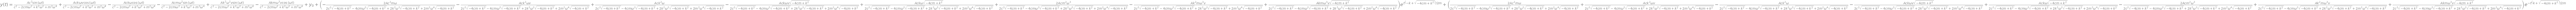

In [13]:
#
# Python code of Task 2
#
def quarterCarSolutionIVPTest():
    global m, k, c, y_0, v, A, omega
    m, k, c, y_0, v, A, omega = sp.symbols('m, k, c, y_0, v, A, omega')
    y = quarterCarSolutionIVP()
    #sp.pprint(y)
    display(y)

quarterCarSolutionIVPTest()

### 2.5 Numerical solution
The most basic approximation method for solving ODEs is Euler's method.
In our approach, we will only focus on this simple method.
The idea is to convert the second-order ODE into two first-order ODEs.

<div class="alert alert-block alert-info">
    
### Task 3: State variables <font color=red>(2 points)</font>
Rewrite the initial value problem $(**)$ into a system with two first-order equations using the state variables $z_0$ and $z_1$.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 3</b>


Mit $y = z_0$ ergibt sich:
    
$$
    \begin{array}{ccl}
    \dot{z_0} &=& z_1 \\
    m \, \dot{z_1} &=& -c \, \left(z_0 - y_0 - f \left(v \, t \right) \right) - k \, \left( z_1 - v \, \dot{f} \left(v \, t \right)\right)
    \end{array}
$$

Nach z aufgelöst:

$$
    \begin{array}{ccl}
    \dot{z_0} &=& z_1 \\
    \dot{z_1} &=& \frac{-c \, \left(z_0 - y_0 - f \left (v \, t \right) \right) - k \, \left( z_1 - v \, \dot{f} \left(v \, t \right)\right)}{m}
    \end{array}
$$

    


</div>

## 3 Implementation
The implementation should be flexible enough to simulate driving over different test tracks.
It is not guaranteed that the solution of the initial value problem can be exactly calculated analytically for any test track.
Thus the implementation is done with Euler's method.
For this purpose we define numerical values for all physical quantities. 
Please note that the simulation should also work if these values are changed.

In [14]:
def quarterCarNumericalValues():
    m = 150.0   # mass [kg]
    k = 300.0   # damper constant [Ns/m]
    c = 600.0   # spring constant [N/m]
    y_0 = 1.0   # equilibrium [m]
    v = 4.0     # velocity [m/s]
    return m, k, c, y_0, v

### 3.1 Test track
For the rumble strip test track we implement the function `quarterCarRoad()`.
This function not only has a single $x$-value as input argument, but a `numpy.array()` with many $x$-values.
The output consists of two arrays `f` and `fp`, which contain the corresponding function values $f(x)$ and the values of the derivative $f'(x)$ for each $x$ value. 

<div class="alert alert-block alert-info">
    
### Task 4: Rumble strip test track <font color=red>(2 points)</font>
Implement the function `quarterCarRoad()` for the rumble strip test track and test the function with a plot that shows $f(x)$ and $f'(x)$ for a simulation time of one second in a single plot.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 4</b>
    
Implementation of function `quarterCarRoad()`:
</div>

In [15]:
#
# Python code of Task 4
#
def quarterCarRoad(x):
    A = 0.05    # amplitude [m]
    omega = 5.0 # frequency [1/s]
    
    f = np.array(A*np.sin(omega*x))
    fp = np.array(A*omega*np.cos(omega*x))
    
    return f, fp

<div class="alert alert-block alert-success">  
Plot:
</div>

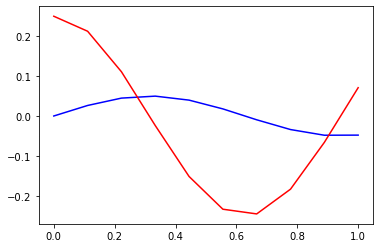

In [16]:
#
# Python code of Task 4
#
def quarterCarRoadTest():
    global m, k, c, y_0, v
    m, k, c, y_0, v = quarterCarNumericalValues()

    x=np.linspace(0, 1, 10)
    f, fp= quarterCarRoad(x)

    plt.plot(x, f, 'blue' )
    plt.plot(x, fp, 'red') 
    plt.show()

    
quarterCarRoadTest()

### 3.2 Euler's method
Using the representation of the initial value problem with state variables form task 3 together with the function `quarterCarRoad()` from task 4, the system of differential equations for Euler's method can be implemented.

<div class="alert alert-block alert-info">
    
### Task 5: Quarter car ode <font color=red>(1 point)</font>
Implement the function `quarterCarOde()`.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 5</b>
    
Implementation of function `quarterCarOde()`:
</div>

In [17]:
#
# Python code of Task 5
# 
def quarterCarOde(t,z):
    
    global m, k, c, y_0, v
    m, k, c, y_0, v = quarterCarNumericalValues()
    
    x = v * t
    f, fp = quarterCarRoad(x)
    zp = np.array([z[1], (-c * (z[0] - y_0 - f) - k * (z[1] -v * fp)) / m])
    
    return zp

The basis for Euler's method is the function `quarterCarOde()`.
The step size $h$ is passed to the function for Euler's method as input argument.
The function should return the time values $t$ and the values for the oszilation of the mass $y$.

<div class="alert alert-block alert-info">
    
### Task 6: Euler's method <font color=red>(3 points)</font>
Implement Euler's method with the function `quarterCarEuler()` using `quarterCarOde()`.
Generete a plot which shows both, the rumble strip $f$ and the oszilation of the mass $y$ in a single plot.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 6</b>
    
Implementation of function `quarterCarEuler()`:
</div>

In [18]:
#
# Python code of Task 6
# 
def quarterCarEuler(h=0.01,t0=0.0,t1=1.0):
    t = np.arange(t0, t1, h)
    n = np.size(t)
    z = np.zeros([2, n])
    z[:,0] = np.array([y_0,0.0])
    
    for k in range(n - 1):
        z[:,k + 1] = z[:,k] + h * quarterCarOde(t[k], z[:,k])
        
    y = z[0,:]

    return t, y

<div class="alert alert-block alert-success">  
Plot:
</div>

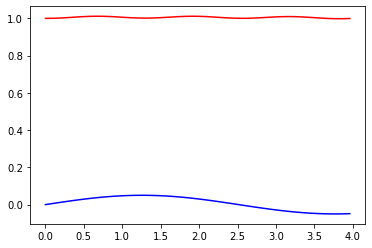

In [19]:
#
# Python code of Task 6
#
def quarterCarEulerTest():
    global m, k, c, y_0, v
    m, k, c, y_0, v = quarterCarNumericalValues()
    
    t,y = quarterCarEuler()
    
    f, fp = quarterCarRoad(t)
    
    x = v * t
    plt.plot(x, f, "blue")
    plt.plot(x, y, 'red')
    plt.show()

    
quarterCarEulerTest()

## 4 Visualization
To visualize a simulation of a test drive, we need a graphical representation of the road profile and the quarter vehicle.

### 4.1 Quarter car
The function `quarterCarDraw()` represents the quarter car.
It must be taken into account that the representation of the spring and damper changes dynamically due to the oscillation process.
In the state of equilibrium the center of the mass is located at a distance of $y_0$ above the roadway.
With the function `quarterCarDraw()` the model of the quarter car can be drawn at any position $x$.
The second input argument $y$ specifies the $y$ position of the mass.

In [24]:
def quarterCarDraw(x,y,f):
    
    # figure
    fig = plt.gcf()
    
    # get axis of figure
    ax = fig.gca()
    ax.axis('equal')   
        
    # wheel
    rr = 0.3; # wheel radius
    tt = np.linspace(0,2*np.pi,24)
    ax.fill(x+rr*np.cos(tt),f+rr+rr*np.sin(tt),'k')
        
    # mass
    ww = 0.6 # mass width
    hh = 0.3 # mass height
    xx = np.array([-1.0, 1.0, 1.0,-1.0,-1.0])
    yy = np.array([-1.0,-1.0, 1.0, 1.0,-1.0])
    ax.fill(x+0.5*ww*xx,y+0.5*hh*yy,'b')

    # absorber
    aa = 0.5 # absorber length
    yy = np.array([ 0.0, 0.0, 1.0, 1.0, 0.0])
    ax.fill(x+0.1*ww*xx,y-aa*yy,'r')
    ax.fill(x+0.05*ww*xx,f+rr+aa*yy,'r')

    # spring
    ll = 0.1 # spring length
    dd = (y - f - 2*ll - rr)/6.0
    xx = np.array([0.0,-rr,rr,-rr,rr,-rr,rr,0.0])
    yy = np.array([0.0,0.5,1.5,2.5,3.5,4.5,5.5,6])
    ax.plot(np.array([x,x]),f+rr+np.array([0.0,ll]),'g',linewidth=4)
    ax.plot(x+xx,f+rr+ll+dd*yy,'g',linewidth=4)
    ax.plot(np.array([x,x]),y-np.array([ll,0.0]),'g',linewidth=4)
    
    return

The position $y$ should be calculated by Euler's method before using it as input for the function `quarterCarDraw()`.

In [25]:
def quarterCarDrawTest():
    global m, k, c, y_0, v
    m, k, c, y_0, v = quarterCarNumericalValues()

    # oszilation of the mass y 
    t, y = quarterCarEuler()

    # road f
    x = v*t
    f, fp = quarterCarRoad(x)

    # figure
    fig = plt.gcf()
    fig.clf()
    fig.set_size_inches(20,5)

    # get axis of figure
    ax = fig.gca()
 
    # draw road
    ax.plot(x,f,'-b')
 
    # draw quarter car
    n = np.size(t)
    quarterCarDraw(x[n//2],y[n//2],f[n//2])
    
    return

#quarterCarDrawTest()

In [26]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('quarter_car_rumble_strip.gif', width=720, height=180))

<div class="alert alert-block alert-info">
    
### Task 7: Animation <font color=red>(3 points)</font>

Implement a frame function and generate an animation video of the quarter car on the rumble strip test track.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 7</b>
    
Frame function:
</div>

In [43]:
#
# Python code of Task 7
#
def quarterCarFrame(k):

    plt.cla()
    ax.plot(x, f, '-b')
    quarterCarDraw(x[k], y[k], f[k])  
    

    return

<div class="alert alert-block alert-success">  
<b>Solution of Task 7</b>
    
Generation of an animation video:
</div>

In [44]:
#
# Python code of Task 7
#
def quarterCarAnimation():
    global m, k, c, y_0, v, x, y, f, ax
    m, k, c, y_0, v = quarterCarNumericalValues()
    
    t, y = quarterCarEuler()
    
    x=v * t
    f, fp = quarterCarRoad(x)



    fig = plt.figure()
    fig.set_size_inches(20, 5)

    ax = plt.gca()
    ax.axis('equal')
    ax.set_title('quarterCarAnimation')

 
    return FuncAnimation(fig, quarterCarFrame, frames=np.arange(1, x.size))

display(HTML(quarterCarAnimation().to_jshtml()))
    
# close figure
plt.close(plt.gcf())

## 5 Evaluation
In the simulation of the quarter car, the differences between verification and validation can be clearly illustrated when evaluating a simulation.   
During verification, we check whether the results of the calculations are in line with our theoretical model.
The task of validation is to assess the extent to which this simulation allows conclusions to be drawn about the vehicle's driving dynamics.

### 5.1 Verification
With simulations based on numerical solution methods, the question arises as to how reliable the numerical approximate values are.
The accuracy of Euler's method depends mainly on the step size $h$.
One needs small step sizes in order to solve the problem with a corresponding accuracy.
On the other hand, small step sizes require considerably more steps and thus more calculation operations.
This increases the computing time required to run a simulation.
A further disadvantage of small step sizes is the rounding error problem.

The trick is now to determine a step size optimally adapted to the problem.
The determination of optimal step sizes is a central topic of numerical mathematics.
However, this determination requires a deeper understanding of numerical approximation methods.
We are therefore content with an experimental consideration.
For a sinusoidal road profile, we have already implemented the calculation of the exact symbolic solution, see `quarterCarSolutionIVP()`.
Thus we can compare the numerically calculated approximate values with the analytically determined exact solution for this road profile.

The idea is to use SymPy as a code generator for the exact analytical solution.
The function `quarterCarAnalytic()` should be implemented according to the function `quarterCarEuler()`.
The step size $h$ is passed as input argument to the function.
The function should return the time values $t$ and the values for the oszilation of the mass $y$.

<div class="alert alert-block alert-info">
    
### Task 8: Code generation <font color=red>(2 points)</font>

Use `sympy.lambdify()`, `quarterCarNumericalValues()` and `quarterCarSolutionIVP()` to implement the function `quarterCarAnalytic()`.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 8</b>
    
Implementation of 'quarterCarAnalytic()`:
</div>

In [101]:
#
# Python code of Task 8
#
def quarterCarAnalytic(h=0.01,t0=0.0,t1=1.0):
    global m, k, c, y_0, v, A, omega
    m, k, c, y_0, v = quarterCarNumericalValues()
    A = 0.05
    omega = 5.0
    
    t = sp.Symbol('t')
    y = quarterCarSolutionIVP()
        
    lamb = sp.lambdify(t, y)

    
    return lamb(t0), lamb(t1)

In [102]:
#
# Comparision of symbolical and numerical results
#
def quarterCarAnalyticTest():
    t1, y1 = quarterCarAnalytic()
    t2, y2 = quarterCarEuler()
    plt.plot(t1,y1,'-b',t2,y2,'-r')
    
quarterCarAnalyticTest()    

NameError: name 'y' is not defined

<div class="alert alert-block alert-info">
    
### Task 9: Step size <font color=red>(1 point)</font>
Use the functions `quarterCarEuler()` and `quarterCarAnalytic()` to determine the maximum deviation of the numerical approximate values from the exact analytical solution.
For this purpose use the step sizes $h=0.01$, $h=0.001$ and $h=0.0001$. 
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 9</b>
    
Maximum deviation of the numerical approximate values from the exact analytical solution:
</div>

In [104]:
#
# Python code of Task 9
#
def quarterCarStepSize():
    t, y_analytic = quarterCarAnalytic(0.1)
    t, y_euler = quarterCarEuler(0.1)
    y_dif = abs(y_analytic - y_euler)
    
    max_dif = max(y_dif)
    print(f'Größter Unterschied für h={0.1} ist {max_dif}.')
    
    t, y_analytic = quarterCarAnalytic(0.01)
    t, y_euler = quarterCarEuler(0.01)
    y_dif = abs(y_analytic - y_euler)
    
    max_dif = max(y_dif)
    print(f'Größter Unterschied für h={0.01} ist {max_dif}.')
    
    t, y_analytic = quarterCarAnalytic(0.001)
    t, y_euler = quarterCarEuler(0.001)
    y_dif = abs(y_analytic - y_euler)
    
    max_dif = max(y_dif)
    print(f'Größter Unterschied für h={0.001} ist {max_dif}.')
    
    return
        
quarterCarStepSize()

NameError: name 'y' is not defined

In simulations based on numerical solutions of differential equations, the calculations are often performed using Runge-Kutta methods.
Compared to Euler's method, higher order Runge-Kutta methods produce more accurate results.
In addition, Runge-Kutta methods offer good methods for error estimation and, based on these, mechanisms for automatic step size control.

### 5.2 Validation
A further aspect in the evaluation is the question of whether the simulation actually provides usable results for vehicle dynamics.
It should be kept in mind that the quarter car only provides a rough model, in which some important factors, such as the stiffness of the entire vehicle or the distribution of the mass to the individual wheels, are not taken into account.

## 6 Embedding
It would be nice to have a graphical user interface for embedding the simulation.
This user interface could offer a selection of different road profiles for selection and take over the configuration of the parameters of the quarter car.
A graphical editor for creating different road profiles would be helpful.  

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('quarter_car_ramp.gif', width=720, height=180))

<div class="alert alert-block alert-info">
    
## Task 10: Ramp test track <font color=red>(2 points)</font>
A test track with a ramp can be simulated by the function
    
$$
    f(x) = \left\{
    \begin{array}{ccl}
        0        & \mbox{ for } & x \leq 1,\\
        0.2(x-1) & \mbox{ for } & 1 < x \leq 2,\\
        0.2      & \mbox{ for } & x > 2.\\
    \end{array}
    \right.
$$
    
Reimplement the function `quarterCarRoad()` and generate an animation video of the quarter car on the test track with this ramp.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 10</b>
    
Reimplementation of the function `quarterCarRoad()` :
</div>

In [ ]:
#
# Python code of Task 10
#
def quarterCarRoad(x):
    if type(x) is np.ndarray:
        f  = np.array([])
        fp = np.array([])


    else:
        f  = 0.0
        fp = 0.0
        







    return f, fp

In [ ]:
#display(HTML(quarterCarAnimation().to_jshtml()))
# close figure
plt.close(plt.gcf())

## Literature
 - [https://en.wikipedia.org/wiki/Vehicle_dynamics](https://en.wikipedia.org/wiki/Vehicle_dynamics)
 - [https://en.wikipedia.org/wiki/Euler_method](https://en.wikipedia.org/wiki/Euler_method)
 - [https://en.wikipedia.org/wiki/Runge-Kutta_methods](https://en.wikipedia.org/wiki/Runge-Kutta_methods)
 - [J.Koch, M.Stämpfle: Mathematik für das Ingenieurstudium](https://www.hanser-fachbuch.de/buch/Mathematik+fuer+das+Ingenieurstudium/9783446451667)